In [17]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [18]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

### Prepare the data

In [20]:
from helpers import standardize

def prepare(x):
    """
    Prepare the data by standardizing and replacing unused 
    values (-999) by the mean of their columns such that they
    don't affect the computation then.
    """
    # Here we 
    xt = x.T
    for xi in xt:
        xi[xi==-999] = np.nan
        m = np.nanmean(xi)
        nanidx = np.where(np.isnan(xi))
        xi[nanidx] = m
        
    tx, mean, std = standardize(tX)
    
    return tx
    
tx = prepare(tX)

### Exploratory data analysis

In [21]:
rows, features = tx.shape
print('Number of data entries:', rows)
print('Number of feature:', features)
print(tx.shape)
print(tx[:, 1].shape)

Number of data entries: 250000
Number of feature: 31
(250000, 31)
(250000,)


[ 0.06833197  0.55250482  3.19515553 ...,  0.31931645 -0.84532397
  0.66533608]


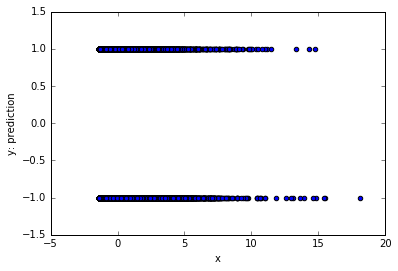

In [22]:
plt.rcParams['agg.path.chunksize'] = 10000
feature1 = tx[:, 2]
print(feature1)
plt.scatter(feature1, y)
plt.xlabel('x')
plt.ylabel('y: prediction')
plt.show()

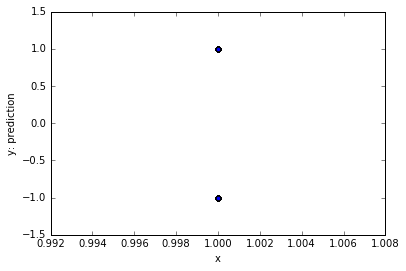

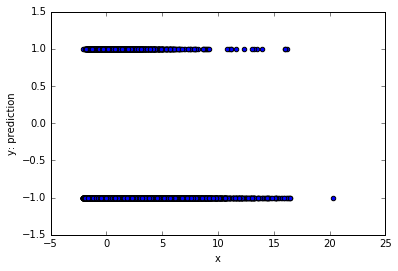

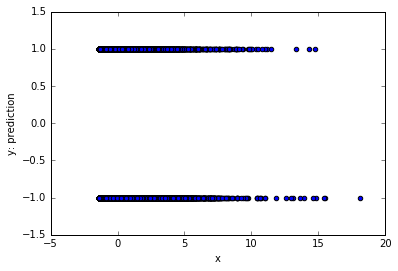

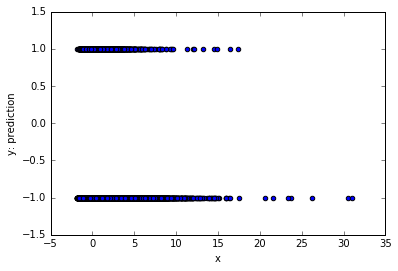

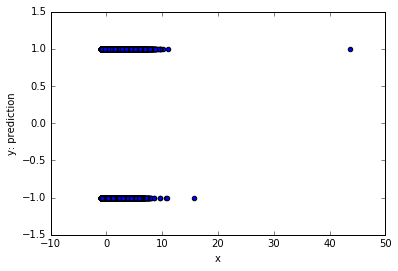

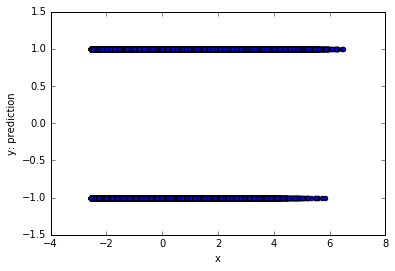

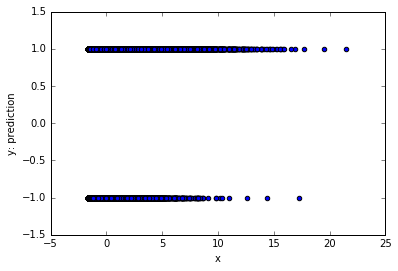

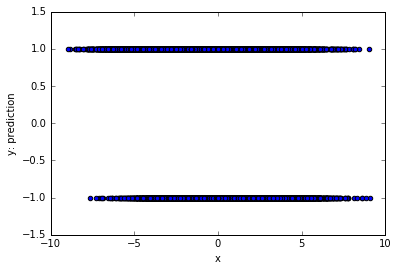

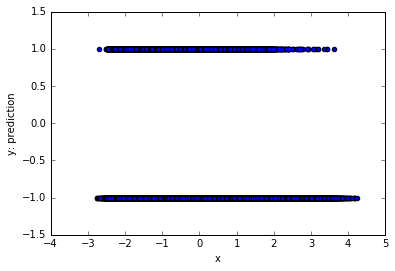

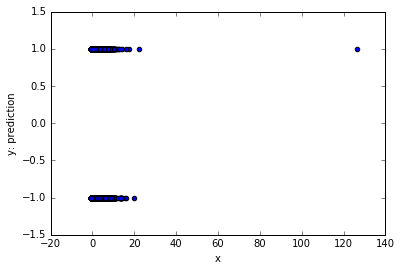

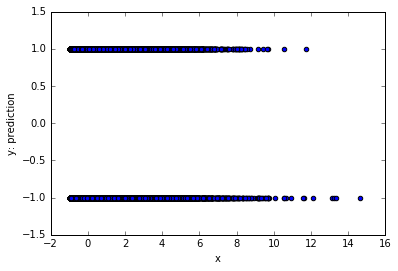

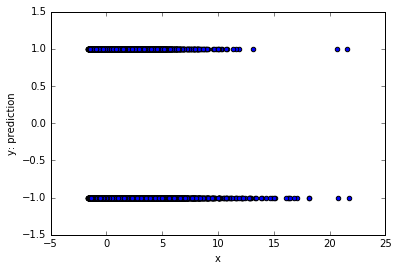

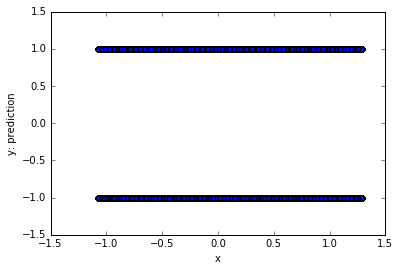

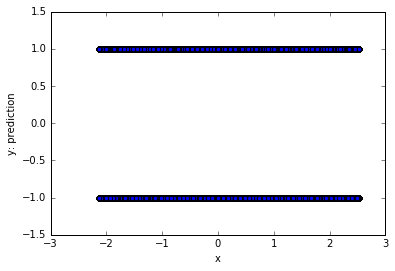

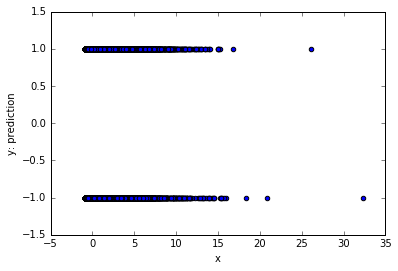

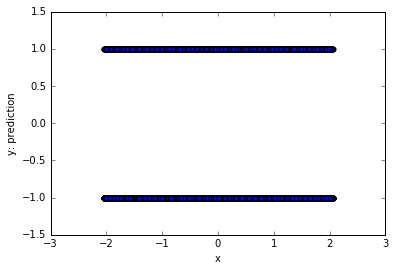

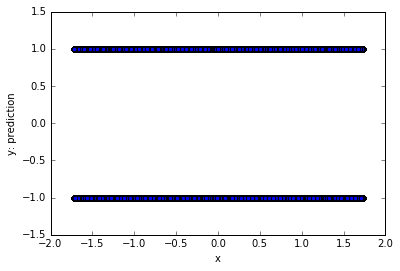

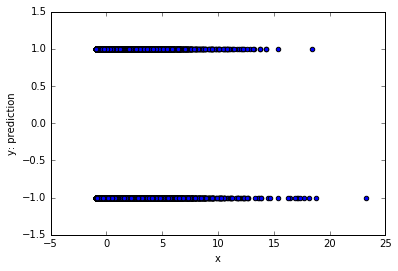

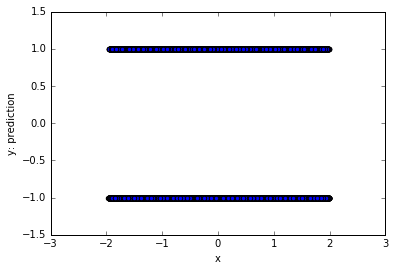

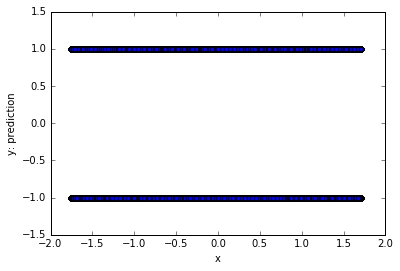

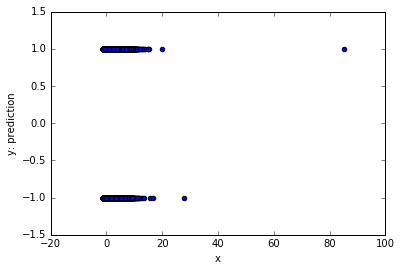

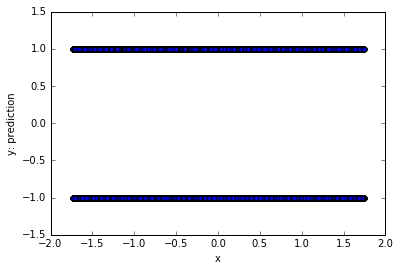

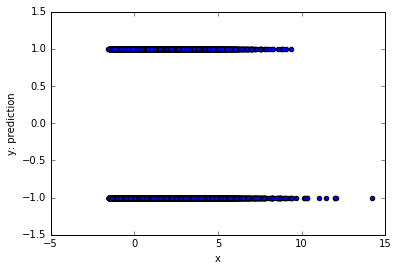

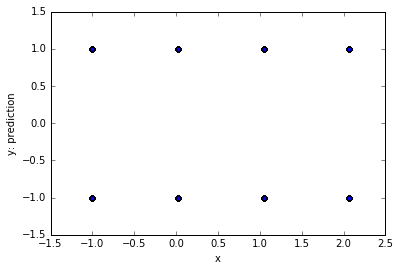

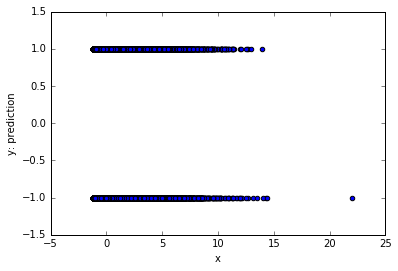

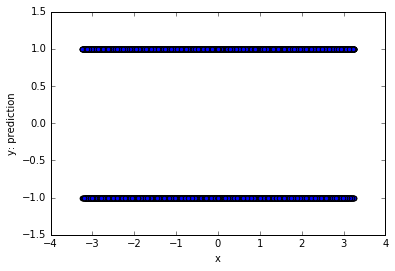

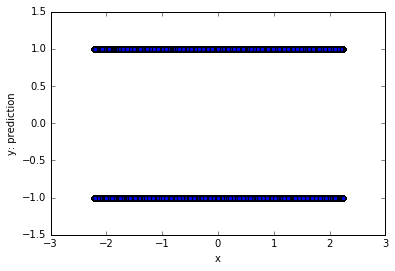

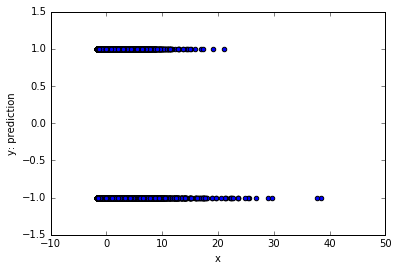

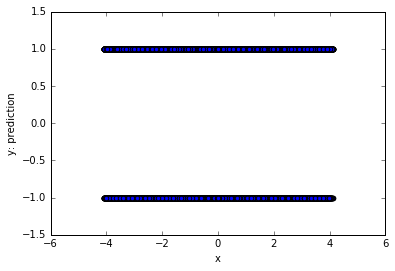

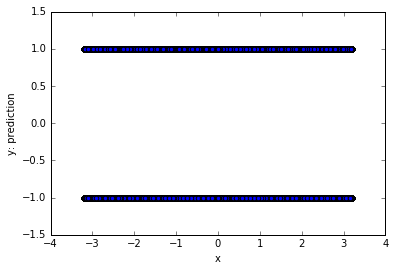

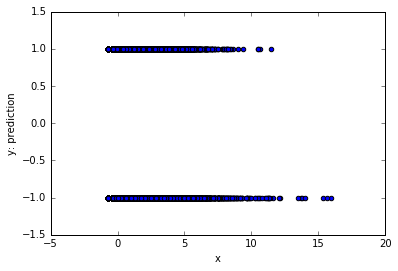

In [23]:
for f in range(0, features):
    featureData = tx[:, f]
    plt.scatter(featureData, y)
    plt.xlabel('x')
    plt.ylabel('y: prediction')
    plt.show()

### Exploratory data comments

For feature : 

    4-  > 40 =>  1
    5-  > 6  =>  1
    
    1-  > 20 => -1 [10,20] => more likely to be -1
    3-  > 20 => -1
    21- > 10 => -1
    26- > 22 => -1
    29- > 13 => -1
    

## Process the Machine Learning

#### Differents learning methods

In [37]:
from least_squares import *
from regression import *

def learn_with(y, tx, lambda_=0.1, gamma=0.1, max_iters=10, method="least_squares"):
    if method == 'least_squares':
        return least_squares(y, tx)
    
    if method == 'least_square_GD': 
        return least_squares_GD(y, tx, gamma, max_iters)

    if method == 'least_square_SGD': 
        return least_squares_SGD(y, tx, gamma, max_iters)

    if method == 'logistic_regression': 
        return logistic_regression(y, tx, gamma, max_iters)

    if method == 'pen_logisitic_regression': 
        return pen_logisitic_regression(y, tx, lambda_, gamma, max_iters)
    
    return least_squares(y, tx)

#### Training phase

In [40]:
def train(y, tx):
    
    loss, w = learn_with(y, tx, "least_squares")
    
    return loss, w

loss, weights = train(y, tx)

## Generate predictions and save ouput in csv format for submission:

In [43]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

tx_test = prepare(tX_test)


In [44]:
OUTPUT_PATH = '../output/out.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)